# Fifa practice

Se quiere predecir los valores de los jugadores.

## Import libraries



In [1]:
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sb
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

## Read the data

Para leer se usa ``pandas`` y la utilidad de la libreria
``os``.


In [2]:
datos = pd.read_csv(os.path.join("..", "in", "fifa.csv"))
datos.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Funcion que permite transformar la variable value a un float(elimina el signo € y transforma el signo de miles y de millones):

In [3]:
def value_to_float(x):
    """
    From K and M to float.
    
    """
    x = x.replace('€', '')
    ret_val = 0.0
    
    if type(x) == float or type(x) == int:
        ret_val = x
    if 'K' in x:
        if len(x) > 1:
            ret_val = float(x.replace('K', ''))
        ret_val = ret_val *1000
    if 'M' in x:
        if len(x) > 1:
            ret_val = float(x.replace('M', ''))
        ret_val = ret_val * 1000000.0
    return ret_val

In [4]:
datos['Value']=datos['Value'].apply(value_to_float)
datos.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Seleccion De variables

Segun mi conocimiento del modelo y tras varios intentos buscando las columnas mas correlacionadas(se puede observar mas adelante) con el valor se seleccionan las siguientes columnas:

In [5]:
variables=['International Reputation','Overall','Potential','Reactions','Club','Value']
modelo_analizable = datos[[*variables]]
modelo_analizable.head()

,International Reputation,Overall,Potential,Reactions,Club,Value
0,5.0,94,94,95.0,FC Barcelona,110500000.0
1,5.0,94,94,96.0,Juventus,77000000.0
2,5.0,92,93,94.0,Paris Saint-Germain,118500000.0
3,4.0,91,93,90.0,Manchester United,72000000.0
4,4.0,91,92,91.0,Manchester City,102000000.0


Numero de filas y de columnas

In [6]:
modelo_analizable.shape

(18207, 6)

# Visualizar los datos

Se muestra la distribucion del valor,es decir cuantos jugadores tienen x valor.

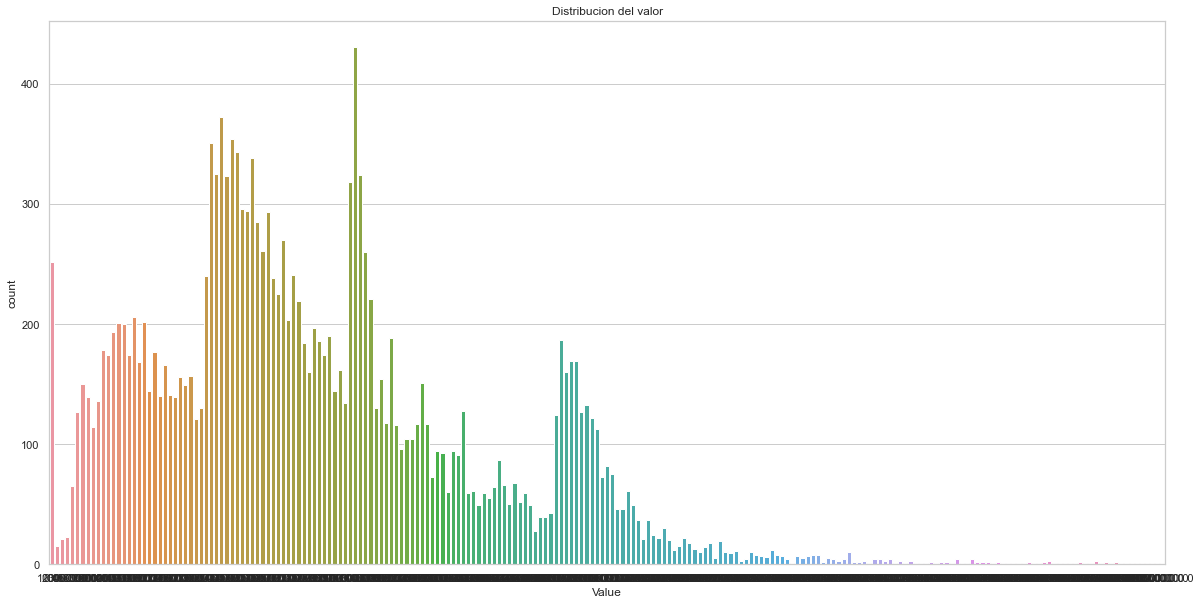

In [7]:
plt.figure(1,figsize=(20,10))
sb.set(style="whitegrid")
sb.countplot(x='Value', data=modelo_analizable)
plt.title('Distribucion del valor')
plt.show()

Se realiza lo mismo anteriormente mencionada con el resto de columnas a analizar.

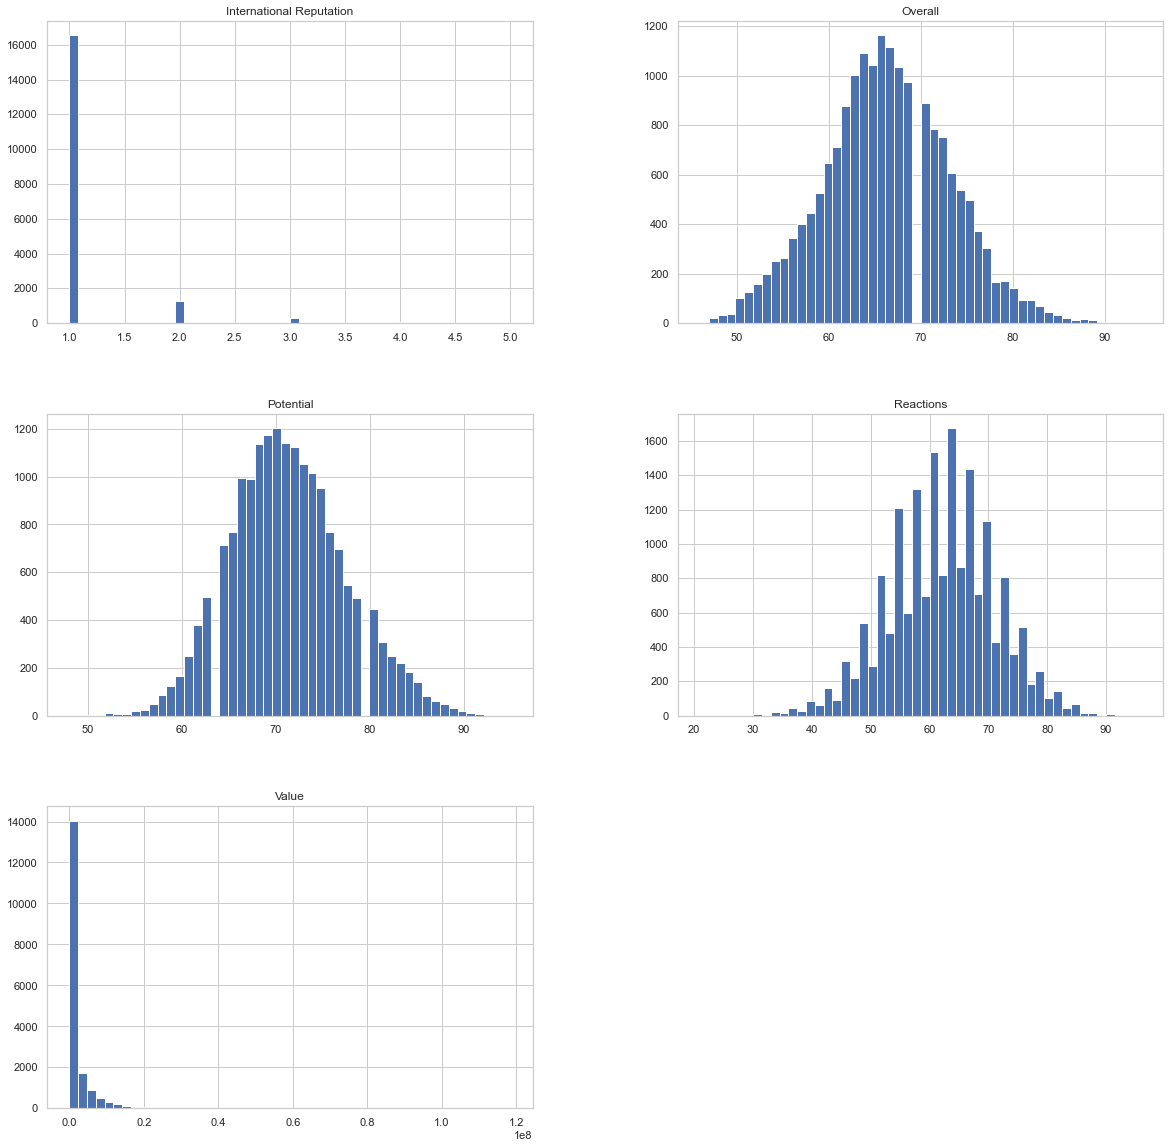

In [8]:
modelo_analizable.hist(bins=50 , figsize=(20,20))
plt.show()

# Correlaciones entre las variables seleccionadas

Se genera la matriz para la visualizacion de las correlaciones.

In [9]:
matriz_correlaciones=modelo_analizable.corr()
matriz_correlaciones.shape

(5, 5)

Se muestran los valores de las correlaciones con el valor de forma descendiente.

In [10]:
matriz_correlaciones["Value"].sort_values(ascending=False)

Value                       1.000000
International Reputation    0.653176
Overall                     0.627085
Potential                   0.576218
Reactions                   0.540552
Name: Value, dtype: float64

Se muestra de forma grafica la correlacion de las distintas variables entre ellas.

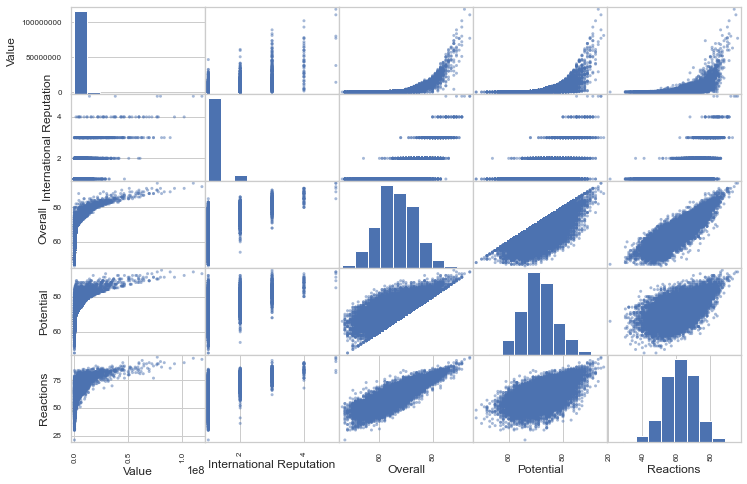

In [11]:
attributes = ["Value", "International Reputation", "Overall",
              "Potential", "Reactions"]
scatter_matrix(modelo_analizable[attributes], figsize=(12, 8))
plt.show()

# Data Cleaning

Se muestra cuales de las variables seleccionadas contienen valores de tipo NaN

In [12]:
print('\nValores NaN en las columnas seleccionadas:')
modelo_analizable.isnull().any()


Valores NaN en las columnas seleccionadas:


International Reputation     True
Overall                     False
Potential                   False
Reactions                    True
Club                         True
Value                       False
dtype: bool

Se muestra el numero de valores NaN que tienen las variables.

In [13]:
lista=list(modelo_analizable['Value']==0)
print('Ceros en la lista de valores',len([v for v in lista if v==True]))
lista2=list(modelo_analizable['International Reputation'].isna())
print('NaN de International Reputation',len([v for v in lista2 if v==True]))
lista3=list(modelo_analizable['Reactions'].isna())
print('NaN de Reactions',len([v for v in lista3 if v==True]))
lista4=list(modelo_analizable['Club'].isna())
print('NaN de Club',len([v for v in lista4 if v==True]))



Ceros en la lista de valores 252
NaN de International Reputation 48
NaN de Reactions 48
NaN de Club 241


Se eliminan los valores NaN del modelo_analizable por que como se ha comprovado anteriormente que son pocos no es perjudicial para el analisis.

In [14]:
modelo_analizable = modelo_analizable.dropna(subset = ['Club'])
modelo_analizable = modelo_analizable.dropna(subset = ['International Reputation'])
modelo_analizable = modelo_analizable.dropna(subset = ['Reactions'])

modelo_analizable

,International Reputation,Overall,Potential,Reactions,Club,Value
0,5.0,94,94,95.0,FC Barcelona,110500000.0
1,5.0,94,94,96.0,Juventus,77000000.0
2,5.0,92,93,94.0,Paris Saint-Germain,118500000.0
3,4.0,91,93,90.0,Manchester United,72000000.0
4,4.0,91,92,91.0,Manchester City,102000000.0
...,...,...,...,...,...,...
18202,1.0,47,65,49.0,Crewe Alexandra,60000.0
18203,1.0,47,63,40.0,Trelleborgs FF,60000.0
18204,1.0,47,67,47.0,Cambridge United,60000.0
18205,1.0,47,66,21.0,Tranmere Rovers,60000.0


Se observa que han sido removidos exitosamente.

In [15]:
print('\nValores NaN en las columnas seleccionadas:')
modelo_analizable.isnull().any()


Valores NaN en las columnas seleccionadas:


International Reputation    False
Overall                     False
Potential                   False
Reactions                   False
Club                        False
Value                       False
dtype: bool

Se resetean los indices

In [16]:
modelo_analizable=pd.DataFrame(modelo_analizable.reset_index(drop=True), columns=modelo_analizable.columns)
modelo_analizable

,International Reputation,Overall,Potential,Reactions,Club,Value
0,5.0,94,94,95.0,FC Barcelona,110500000.0
1,5.0,94,94,96.0,Juventus,77000000.0
2,5.0,92,93,94.0,Paris Saint-Germain,118500000.0
3,4.0,91,93,90.0,Manchester United,72000000.0
4,4.0,91,92,91.0,Manchester City,102000000.0
...,...,...,...,...,...,...
17913,1.0,47,65,49.0,Crewe Alexandra,60000.0
17914,1.0,47,63,40.0,Trelleborgs FF,60000.0
17915,1.0,47,67,47.0,Cambridge United,60000.0
17916,1.0,47,66,21.0,Tranmere Rovers,60000.0


Se extrae la columna club y se guarda en una variable por que se van a normalizar los datos numericos.

In [17]:
club=modelo_analizable.pop("Club")
modelo_analizable


,International Reputation,Overall,Potential,Reactions,Value
0,5.0,94,94,95.0,110500000.0
1,5.0,94,94,96.0,77000000.0
2,5.0,92,93,94.0,118500000.0
3,4.0,91,93,90.0,72000000.0
4,4.0,91,92,91.0,102000000.0
...,...,...,...,...,...
17913,1.0,47,65,49.0,60000.0
17914,1.0,47,63,40.0,60000.0
17915,1.0,47,67,47.0,60000.0
17916,1.0,47,66,21.0,60000.0


Se normalizan los datos de las columnas seleccionadas y se extrae el valor por que no ha de ser normalizado para no predecir valores que no son reales.

In [18]:
valor=modelo_analizable.pop("Value")
modelo_analizable


,International Reputation,Overall,Potential,Reactions
0,5.0,94,94,95.0
1,5.0,94,94,96.0
2,5.0,92,93,94.0
3,4.0,91,93,90.0
4,4.0,91,92,91.0
...,...,...,...,...
17913,1.0,47,65,49.0
17914,1.0,47,63,40.0
17915,1.0,47,67,47.0
17916,1.0,47,66,21.0


 Funcion de normalizacion 

Z-score

In [19]:
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    

Se guarda el modelo sin normalizar para mas adelante utilizarlo como datos sobre los que predecir.
Aplicamos z_score como normalizacion para el posterior entreno del modelo.

In [20]:
modelo_sin_normalizar=modelo_analizable
modelo_analizable=z_score(modelo_analizable)
modelo_analizable


,International Reputation,Overall,Potential,Reactions
0,9.825889,4.006671,3.689828,3.676637
1,9.825889,4.006671,3.689828,3.787447
2,9.825889,3.718039,3.527071,3.565826
3,7.297413,3.573723,3.527071,3.122584
4,7.297413,3.573723,3.364313,3.233394
...,...,...,...,...
17913,-0.288013,-2.776176,-1.030149,-1.420648
17914,-0.288013,-2.776176,-1.355664,-2.417943
17915,-0.288013,-2.776176,-0.704633,-1.642269
17916,-0.288013,-2.776176,-0.867391,-4.523343


Se concatena los clubs transformados en variables numericas a las dos tablas anteriores.

In [21]:
modelo_sin_normalizar=pd.concat([modelo_sin_normalizar, valor,pd.get_dummies(club, prefix='clb')], axis=1, sort=False)

modelo_analizable = pd.concat([modelo_analizable,valor, pd.get_dummies(club, prefix='clb')], axis=1, sort=False)
modelo_analizable

,International Reputation,Overall,Potential,Reactions,Value,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,...,clb_Wycombe Wanderers,clb_Yeni Malatyaspor,clb_Yeovil Town,clb_Yokohama F. Marinos,clb_Zagłębie Lubin,clb_Zagłębie Sosnowiec,clb_Çaykur Rizespor,clb_Örebro SK,clb_Östersunds FK,clb_Śląsk Wrocław
0,9.825889,4.006671,3.689828,3.676637,110500000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.825889,4.006671,3.689828,3.787447,77000000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.825889,3.718039,3.527071,3.565826,118500000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.297413,3.573723,3.527071,3.122584,72000000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.297413,3.573723,3.364313,3.233394,102000000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,-0.288013,-2.776176,-1.030149,-1.420648,60000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17914,-0.288013,-2.776176,-1.355664,-2.417943,60000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17915,-0.288013,-2.776176,-0.704633,-1.642269,60000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17916,-0.288013,-2.776176,-0.867391,-4.523343,60000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Crear test 

Se parte el modelo normalizado en un 80% para entrenar el modelo y en un 20% de testeo para comprovar el rendimiento del modelo en predicciones que no ha visto durante ese entreno

In [22]:
np.random.seed(42)

In [23]:
train_set, test_set = train_test_split(modelo_analizable, test_size=0.2, random_state=42)
test_set=pd.DataFrame(test_set.reset_index(drop=True), columns=test_set.columns)

Se muestran el numero de ejemplos de los datos en cada uno de los modelos.

In [24]:
print('Train',' ','Test')
print(len(train_set),'+',len(test_set),'=',len(train_set)+len(test_set))


Train   Test
14334 + 3584 = 17918


Se muestran los valores de la tabla test y para que se pueda ver algunos indices para predecir mas adelante.

In [25]:
valor_test=test_set.pop("Value")
valor_test

0        200000.0
1        800000.0
2        425000.0
3       1300000.0
4       3700000.0
          ...    
3579      40000.0
3580     120000.0
3581    2000000.0
3582     950000.0
3583    1300000.0
Name: Value, Length: 3584, dtype: float64

Igual que el caso anterior se muestran los valores de la tabla sin normalizar y sus indices.

In [26]:
valor_no_normalizado=modelo_sin_normalizar.pop("Value")
valor_no_normalizado

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
17913        60000.0
17914        60000.0
17915        60000.0
17916        60000.0
17917        60000.0
Name: Value, Length: 17918, dtype: float64

# Ramdom forest

Se aplica un modelo de ramdom forest que por defecto utilizara 100 arboles en su interior para el entreno.

El ramdom forest consiste en divirdir el dataset de entreno en los X arboles pedidos, en este caso por defecto son 100, y entrena cada arbol con una varianza alta para despues a la hora de predecir se realizara una prediccion en los 100 arboles y se realizara una media entre ellos para generar el dato predicho.

In [27]:
valor=modelo_analizable.pop("Value")
forest_pred=RandomForestRegressor(n_estimators=100,random_state=42)
forest_pred.fit(modelo_analizable,valor)

RandomForestRegressor(random_state=42)

Se generan las predicciones para comprobar su rendimiento y se muestra la tabla con las predicciones y sus valores reales.

In [28]:
predicciones=forest_pred.predict(modelo_analizable)
p=pd.DataFrame(predicciones, columns=["Prediccion"])
tabla_comparativa=pd.concat([p,valor], axis=1, sort=False)
tabla_comparativa

,Prediccion,Value
0,103845000.0,110500000.0
1,89050000.0,77000000.0
2,106665000.0,118500000.0
3,77985000.0,72000000.0
4,88670000.0,102000000.0
...,...,...
17913,59200.0,60000.0
17914,58400.0,60000.0
17915,59400.0,60000.0
17916,58700.0,60000.0


Se utiliza el r2_score para comprovar el rendimiento sobre el dataset de entreno y se muestra. 

In [29]:
score = r2_score(valor, predicciones)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 99.02 %


Se muestra el rendimiento conseguido en el test con los valores que el modelo no ha visto durante el entreno y la tabla de predicciones del test con sus valores reales.

In [30]:
predicciones2=forest_pred.predict(test_set)
t=pd.DataFrame(predicciones2, columns=["Prediccion"])
tabla_comparativa2=pd.concat([t,valor_test], axis=1, sort=False)
tabla_comparativa2

,Prediccion,Value
0,236600.0,200000.0
1,739062.5,800000.0
2,439750.0,425000.0
3,2025000.0,1300000.0
4,3817000.0,3700000.0
...,...,...
3579,242800.0,40000.0
3580,123200.0,120000.0
3581,2012000.0,2000000.0
3582,1127000.0,950000.0


In [31]:
score = r2_score(valor_test, predicciones2)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 99.13 %


Funcion que normaliza los datos que queramos usar para predecir.

In [32]:
def z_score2(modelo_original,test_predecir):
    # copy the dataframe
    df_std =modelo_original.copy()
    df_predecir =test_predecir.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_predecir[column] = (df_predecir[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_predecir

Ejemplo para comprovar que funciona la prediccion en los datos no normalizados explicados anteriormente

In [33]:
datos_predecir=z_score2(modelo_sin_normalizar,modelo_sin_normalizar.loc[[3]])

In [34]:
forest_pred.predict(datos_predecir)

array([77985000.])